In [1]:
import pandas as pd
import numpy as np

In [2]:
def one_hot(y_train):
    max_y=np.max(y_train)+1
    temp=np.zeros([max_y,y_train.shape[1]])
    for i in range(y_train.shape[1]):
        k=y_train[0][i]                    # k Just another temp variable
        temp[k][i]=1
    return temp

In [21]:
def softmax(X):
    """Compute the K-way softmax function inplace.
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        The input data.
    Returns
    -------
    X_new : {array-like, sparse matrix}, shape (n_samples, n_features)
        The transformed data.
    """
    X=X.T
    tmp = X - X.max(axis=1)[:, np.newaxis]
    np.exp(tmp, out=X)
    X /= X.sum(axis=1)[:, np.newaxis]

    return X.T

In [4]:
def relu(z):
    return(np.maximum(z,0.0))

In [5]:
def sigmoid(z):
    return(1.0/(1.0+np.exp(-z)))

In [6]:
def tanh(z):
    return(np.tanh(Z))

In [7]:
def model(no_hd_l, hd_unit, input_size, output_size, initialization=None):
    ''' Initialize weights and bias according to type of initialization and no of hidden layers 
        defined by user
        no_hd_l        -- no of hiddel layers
        hd_unit        -- list no of units(neuron) in each layer
        input_size     -- size of input or the layer 0
        output_size    -- size of output layer(last layer) or the number of elements to classify
        initialization -- type of initialization i.e. None, He, Xavier
        '''
    
    if(len(hd_unit)!=no_hd_l):
        raise ValueError('Size of hidden unit list != No of hidden layer')
        return
    
    hd_unit=[input_size]+hd_unit
    hd_unit=hd_unit+[output_size]
    parameters=dict()
    
    if(initialization is None):
        for i in range(1,no_hd_l+2):
            parameters['W'+str(i)]=np.random.randn(hd_unit[i],hd_unit[i-1])
            parameters['b'+str(i)]=np.zeros((hd_unit[i],1))
        
    if(initialization is 'He'):
        for i in range(1,no_hd_l+2):
            parameters['W'+str(i)]=np.random.randn(hd_unit[i],hd_unit[i-1])*np.sqrt(2/hd_unit[i-1])
            parameters['b'+str(i)]=np.zeros((hd_unit[i],1))
        
    if(initialization is 'Xavier'):
        for i in range(1,no_hd_l+2):
            parameters['W'+str(i)]=np.random.randn(hd_unit[i],hd_unit[i-1])*np.sqrt(1/hd_unit[i-1])
            parameters['b'+str(i)]=np.zeros((hd_unit[i],1))
    return(parameters)

In [8]:
def feed_forward(parameters, X_train, no_hd_l, activation):
    ''' Forward Propogation
        parameters -- returned by model function
        X_train    -- training data
        no_hd_l    -- no of hidden layer
        activation -- activation for hidden layers i.e. sigmoid or tanh or relu
    '''
    cache1=dict()
    if(activation is 'relu'):
        cache1['Z1']=np.matmul(parameters['W1'],X_train)+parameters['b1']
        cache1['A1']=relu(cache1['Z1'])
        for i in range(2,no_hd_l+1):
            cache1['Z'+str(i)]=np.matmul(parameters['W'+str(i)],cache1['A'+str(i-1)])+parameters['b'+str(i)]
            cache1['A'+str(i)]=relu(cache1['Z'+str(i)])
    
    if(activation is 'sigmoid'):
        cache1['Z1']=np.matmul(parameters['W1'],X_train)+parameters['b1']
        cache1['A1']=sigmoid(cache1['Z1'])
        for i in range(2,no_hd_l+1):
            cache1['Z'+str(i)]=np.matmul(parameters['W'+str(i)],cache1['A'+str(i-1)])+parameters['b'+str(i)]
            cache1['A'+str(i)]=sigmoid(cache1['Z'+str(i)])
    
    if(activation is 'tanh'):
        cache1['Z1']=np.matmul(parameters['W1'],X_train)+parameters['b1']
        cache1['A1']=tanh(cache1['Z1'])
        for i in range(2,no_hd_l+1):
            cache1['Z'+str(i)]=np.matmul(parameters['W'+str(i)],cache1['A'+str(i-1)])+parameters['b'+str(i)]
            cache1['A'+str(i)]=tanh(cache1['Z'+str(i)])
    
    cache1['Z'+str(no_hd_l+1)]=np.matmul(parameters['W'+str(no_hd_l+1)],cache1['A'+str(no_hd_l)])+parameters['b'+str(no_hd_l+1)]
    cache1['A'+str(no_hd_l+1)]=softmax(cache1['Z'+str(no_hd_l+1)])
    return(cache1)

In [11]:
def cost(A,y,m):
    #A = np.clip(A, 1e-10, 1 - 1e-10)
    
    cost= -np.sum(y*np.log(A))/m
    return(cost)

In [30]:
def log_loss(y_true, y_prob):
    """Compute Logistic loss for classification.
    Parameters
    ----------
    y_true : array-like or label indicator matrix
        Ground truth (correct) labels.
    y_prob : array-like of float, shape = (n_samples, n_classes)
        Predicted probabilities, as returned by a classifier's
        predict_proba method.
    Returns
    -------
    loss : float
        The degree to which the samples are correctly predicted.
    """
    y_prob = np.clip(y_prob, 1e-10, 1 - 1e-10)

    if y_prob.shape[1] == 1:
        y_prob = np.append(1 - y_prob, y_prob, axis=1)

    if y_true.shape[1] == 1:
        y_true = np.append(1 - y_true, y_true, axis=1)

    return -np.sum(y_true * np.log(y_prob)) / y_prob.shape[0]

In [9]:
def cost(z,y,m):
    z_norm=z-np.max(z,axis=0,keepdims=True)
    z_exp=np.exp(z_norm)
    z_sum=np.sum(z_exp,axis=0,keepdims=True)
    temp_log=np.log(z_sum)
    cost=-np.sum(np.multiply((z_norm-temp_log),y))
    return(cost/m)

In [10]:
def back_prop(parameters, cache1, X_train, y_train, no_hd_l, activation, learning_rate, m):
    ''' Backward Propogation 
        parameters     -- returned by model
        cache1         -- returned by feed_forward
        X_train        -- training data
        y_train        -- labels of training data one-hot encoded
        no_hd_l        -- scalar, no of hidden layers
        activation     -- String, type of activation function used in hidden layers i.e. relu or sigmoid or tanh
        learning_rate  -- Scalar, learning rate
    '''
    
    cache2={}
    cache2['dZ'+str(no_hd_l+1)]=(cache1['A'+str(no_hd_l+1)]-y_train)/m
    cache2['dW'+str(no_hd_l+1)]=np.matmul(cache2['dZ'+str(no_hd_l+1)],cache1['A'+str(no_hd_l)].T)
    cache2['db'+str(no_hd_l+1)]=cache2['dZ'+str(no_hd_l+1)]
    i=no_hd_l
    
    if(activation is 'relu'):
        while(i>1):
            cache2['dZ'+str(i)]=np.matmul(parameters['W'+str(i+1)].T,cache2['dZ'+str(i+1)])
            cache2['dW'+str(i)]=np.matmul(cache2['dZ'+str(i)],cache1['A'+str(i-1)].T)
            cache2['db'+str(i)]=cache2['dZ'+str(i)]
            i=i-1
        cache2['dZ1']=np.matmul(parameters['W'+str(i+1)].T,cache2['dZ'+str(i+1)])
        cache2['dW1']=np.matmul(cache2['dZ'+str(i)],X_train.T)
        cache2['db1']=cache2['dZ'+str(i)]
        
    if(activation is 'sigmoid'):
        while(i>1):
            cache2['dZ'+str(i)]=np.matmul(parameters['W'+str(i+1)].T,cache2['dZ'+str(i+1)])*(cache1['A'+str(i)]*np.square(cache1['A'+str(i)]))
            cache2['dW'+str(i)]=np.matmul(cache2['dZ'+str(i)],cache1['A'+str(i-1)].T)
            cache2['db'+str(i)]=cache2['dZ'+str(i)]
            i=i-1
        cache2['dZ1']=np.matmul(parameters['W'+str(i+1)].T,cache2['dZ'+str(i+1)])*(cache1['A1']*np.square(cache1['A1']))
        cache2['dW1']=np.matmul(cache2['dZ'+str(i)],X_train.T)
        cache2['db1']=cache2['dZ'+str(i)]
        
    if(activation is 'tanh'):
        while(i>1):
            cache2['dZ'+str(i)]=np.matmul(parameters['W'+str(i+1)].T,cache2['dZ'+str(i+1)])*(1-np.square(cache1['A'+str(i)]))
            cache2['dW'+str(i)]=np.matmul(cache2['dZ'+str(i)],cache1['A'+str(i-1)].T)
            cache2['db'+str(i)]=cache2['dZ'+str(i)]
            i=i-1
        cache2['dZ1']=np.matmul(parameters['W'+str(i+1)].T,cache2['dZ'+str(i+1)])*(1-np.square(cache1['A1']))
        cache2['dW1']=np.matmul(cache2['dZ'+str(i)],X_train.T)
        cache2['db1']=cache2['dZ'+str(i)]
        
    for i in range(1,no_hd_l+2):
        parameters["W"+str(i)]=parameters["W"+str(i)]-(learning_rate*cache2["dW"+str(i)])
        parameters["b"+str(i)]=parameters["b"+str(i)]-(learning_rate*np.sum(cache2["db"+str(i)],axis=1,keepdims=True))
    return(parameters)

In [11]:
def data():
    df=pd.read_csv("MNIST dataset/train.csv")
    X_train=np.array(df.iloc[:,1:]).T
    y_train=np.array(df.iloc[:,0])
    y_train=y_train.reshape(1,y_train.shape[0])
    y_train=one_hot(y_train) #one hot
    del df
    X_train=(X_train)/255
    m=X_train.shape[1]
    return((X_train, y_train, m))

In [37]:
def train(no_hd_l, hd_unit, initialization, activation, learning_rate):
    # Data
    X_train, y_train, m = data()
    print('No of training example {}'.format(m))
    print('X_train(data) {}'.format(X_train.shape))
    print('y_train(labels) {}'.format(y_train.shape))
    print('max and min value of data {} {}'.format(np.max(X_train),np.min(X_train)))
    print()
    
    # Initialize Parameters
    parameters=model(no_hd_l, hd_unit, input_size=X_train.shape[0],output_size=10,initialization=None)
    
    for i in range(2000):
        cache1=feed_forward(parameters, X_train, no_hd_l, activation)
        print(cost(cache1['Z'+str(no_hd_l+1)], y_train, m))
        print(log_loss(y_train.T, cache1['A'+str(no_hd_l+1)].T))
        back_prop(parameters, cache1, X_train, y_train, no_hd_l, activation, learning_rate,m)
    return(parameters)

In [38]:
parameters=train(1, [100], 'He', 'relu', 0.01)

No of training example 42000
X_train(data) (784, 42000)
y_train(labels) (10, 42000)
max and min value of data 1.0 0.0

2.3432708919063945
19.806373005236047
2.3408073763265786
19.568549590022982
2.340925946349486
19.399225885828393
2.3409100274477566
19.243041182475437
2.3412263861560825
19.108608617651136
2.3406034993415976
18.99487528122191
2.3389387015465792
18.891954739365243
2.3380663296181248
18.788360167600487
2.336130964663331
18.679777435942242
2.3332324431129265
18.566064199928903
2.330751877556976
18.450164780587
2.3280548647437764
18.33301113922056
2.3255177899463115
18.213327551210217
2.3226393872327638
18.094495848868192
2.3197681459300923
17.976602404811246
2.3165179504444495
17.85441132454173
2.3127484939413305
17.728752875290763
2.3088386981078797
17.598289948532507
2.3047804670696355
17.463011650842162
2.300407361842909
17.324008158420682
2.2958549603540956
17.180369449265612
2.2910960985996436
17.03422165950253
2.2860121818623913
16.88558536245713
2.280732350359571
1

1.8236066461962124
6.095941201077559
1.822909331727246
6.082515467921961
1.8222160443510396
6.069187892351683
1.821526802374684
6.055944718021574
1.8208416811434962
6.042790049041758
1.8201608610221471
6.029730145320228
1.819484431991241
6.016778242194591
1.8188125198977672
6.003921613999568
1.8181453411418458
5.991133121919098
1.8174830224803153
5.97842634111086
1.8168258502631132
5.965818244463601
1.8161740110257358
5.953296787383579
1.8155273721480976
5.940859867061651
1.8148858288162917
5.9285214374448145
1.81424931713823
5.916282921009461
1.8136178534143212
5.904138251964907
1.81299131664526
5.892078714323964
1.8123695164736355
5.880092538885739
1.8117522590234567
5.868176980841308
1.811139410911072
5.85633183386356
1.8105308586464408
5.844570394828704
1.809926504844961
5.8328862036655975
1.8093260838058989
5.821280668756855
1.808729610887364
5.809748726721413
1.8081369666116298
5.798285798140406
1.807548106227011
5.786896398034348
1.8069629256174262
5.775589628214157
1.8063812678

1.7351572698482727
4.345300623339389
1.7349233264024737
4.340614424109952
1.734689891666818
4.335943320185903
1.734456959117911
4.331285100422269
1.7342245205552858
4.326638883757665
1.73399256494547
4.322005597715464
1.733761064358951
4.317390453997337
1.7335300153620392
4.312790009346679
1.7332993690469825
4.308205425380286
1.7330691387826682
4.303634678889879
1.7328392211898775
4.2990808701799335
1.7326096297796993
4.294545014011733
1.732380393601793
4.2900248151746245
1.732151509700032
4.2855163477728455
1.7319230301759776
4.281016520845243
1.7316949262584933
4.276528456090488
1.7314672034110536
4.272054051144841
1.7312398266183968
4.267595783831315
1.7310127765572962
4.263152676287101
1.7307860699525366
4.2587231952596865
1.730559664669003
4.254311844941557
1.730333553197072
4.249922337377331
1.7301077743915496
4.2455522827288386
1.7298823245820587
4.2411978419535545
1.729657262701966
4.236858405936286
1.7294326135162226
4.232530706121343
1.729208353886149
4.2282224320149755
1.728

1.6954516247106772
3.6086457287276335
1.6953209338873432
3.6063083836731766
1.6951906312281444
3.6039735259512353
1.6950607195356517
3.6016440545533657
1.6949312063233006
3.599322713162003
1.6948020858891135
3.597007173205624
1.6946733340524966
3.5946980307887717
1.6945449674649042
3.592394584390545
1.6944169955810613
3.590096248288332
1.6942893974969824
3.587803649973098
1.6941621704951693
3.585514040214302
1.6940353174684017
3.5832275593294334
1.6939088386305738
3.5809457797681525
1.6937827229913407
3.5786668089901
1.69365696574339
3.5763931235388804
1.6935315679180587
3.5741256856693218
1.693406507843259
3.5718641498210713
1.6932817876922137
3.56960844518278
1.6931574140116465
3.5673585558793164
1.693033376778337
3.56511171985614
1.6929096564453108
3.562868881322526
1.692786261837204
3.560632691954073
1.6926632077636032
3.558402298113634
1.6925404961388006
3.5561785884235344
1.6924181236656999
3.55396102337224
1.692296092157383
3.551747680655633
1.6921743909357718
3.5495399982618276

1.6730392662574907
3.2025195037195933
1.6729596761989711
3.2010444669457594
1.6728802754834704
3.1995709117872884
1.672801067428891
3.198100711171321
1.6727220521230008
3.196633872609571
1.6726432320594316
3.1951703649799748
1.6725646049190057
3.193708323665599
1.672486167805563
3.1922486449664507
1.672407922592407
3.1907910259497925
1.6723298715123456
3.1893358324369143
1.6722520051730254
3.1878830704313086
1.672174324725495
3.186433463693714
1.6720968251533292
3.1849870348527523
1.6720195133546805
3.1835435368103546
1.671942387981076
3.1821021798288864
1.6718654466937874
3.1806629314713786
1.671788692995256
3.1792267402738204
1.671712135316178
3.1777924776621997
1.671635753496021
3.1763601522990523
1.671559541944669
3.1749297685373805
1.671483506299745
3.1735027647075262
1.6714076547979098
3.1720785508581786
1.6713319869276508
3.1706575139288895
1.6712564700040076
3.169239275444676
1.6711811188812964
3.1678233136646456
1.6711059236925696
3.1664093871488905
1.6710308837717451
3.164996

1.658478666447394
2.9293398990584696
1.6584228758767543
2.9282961473877283
1.6583671611661381
2.9272540281579014
1.6583115187104123
2.9262131160744658
1.6582559578230391
2.925173855801233
1.6582004805688515
2.924136135181927
1.6581450869075607
2.9230999432444227
1.6580897752504526
2.9220647498716805
1.6580345562087948
2.9210310434887545
1.6579794252344806
2.9199991316473204
1.6579243752902053
2.9189686376657606
1.6578694067078141
2.9179397835093424
1.6578145222150473
2.91691303700731
1.6577597212074138
2.9158883207824173
1.6577050037729628
2.9148648659041143
1.6576503689586504
2.9138433433207616
1.657595810999427
2.91282381958849
1.657541334680575
2.9118055723903042
1.6574869416175289
2.910788838925133
1.657432629771158
2.909773587774108
1.6573784072150308
2.908759600997516
1.6573242652806768
2.9077458022847833
1.6572701940611283
2.9067324426660877
1.6572162060107567
2.9057209099876915
1.65716229807443
2.904710413113075
1.6571084711295172
2.9037013331219907
1.6570547287712072
2.9026936

1.6480208873110636
2.7290277467762523
1.6479806478614416
2.7282262984710677
1.6479404637069315
2.7274257494394933
1.6479003397944578
2.726626471294628
1.647860276035761
2.7258282128105535
1.6478202704912006
2.7250308458833605
1.6477803223357563
2.7242344418679965
1.6477404278218704
2.723439089834331
1.6477005840753214
2.7226442995875475
1.6476607949157862
2.721850598869643
1.647621061753658
2.721057706882162
1.6475813800832053
2.7202653947465403
1.6475417360750948
2.719474201516308
1.6475021514448613
2.718683925400927
1.6474626196446964
2.7178944545010166
1.6474231435662008
2.7171062773318164
1.6473837218551552
2.716319107182946
1.647344343204217
2.715533130496635
1.6473050191435212
2.714748020529335
1.6472657508991517
2.7139637640466017
1.6472265390785878
2.713180622120167
1.6471873831701893
2.712398349797005
1.647148283086101
2.7116168278723523
1.647109241466223
2.7108363179369883
1.6470702561799744
2.710056704757001
1.647031331140365
2.7092780139442154
1.6469924583351527
2.708500031

1.6402422472102283
2.570838196879268
1.640210511053094
2.570193133725975
1.6401787970748147
2.569548464652478
1.640147111766904
2.5689037385686437
1.6401154484501994
2.568259516948481
1.6400838158572792
2.5676155419079687
1.6400522084475881
2.566972316361177
1.6400206238012807
2.5663296985131896
1.639989064333155
2.5656875129402366
1.6399575307955128
2.565045888097726
1.6399260217880605
2.5644051682507247
1.6398945370268134
2.5637652778720583
1.6398631064298945
2.5631260890720826
1.6398317034236436
2.5624875357555554
1.6398003272175723
2.5618492178916084
1.6397689777215578
2.561211463730297
1.6397376500905918
2.5605742798409685
1.6397063486444399
2.559937461735299
1.6396750751960454
2.559301404986876
1.63964382811265
2.5586660543282016
1.6396126068637813
2.5580314060771934
1.6395814092410683
2.5573976202798168
1.6395502391659147
2.556764483414747
1.6395190910907975
2.556131918718702
1.6394879708899954
2.555500078710402
1.6394568776682572
2.5548689200927157
1.6394258110867719
2.55423797

1.6338957779361296
2.4411662672659253
1.6338693894828047
2.4406276785546965
1.6338430152496648
2.440089693010468
1.6338166573726622
2.4395515327140807
1.6337903142612835
2.439013674220631
1.633763984768726
2.438476427052525
1.6337376703004265
2.4379397814945913
1.6337113720340646
2.437403538726094
1.6336850899561868
2.436867051232937
1.6336588268526244
2.436330342995061
1.6336325794932838
2.435794008615088
1.6336063499925142
2.4352580442406997
1.6335801388008153
2.434722350531867
1.633553946652144
2.4341865400414715
1.6335277685928107
2.433650576136952
1.633501605856078
2.4331144616399447
1.6334754564442426
2.432578514396533
1.6334493201336975
2.43204302316597
1.6334231978143638
2.431508117505918
1.6333970818342578
2.430973504375537
1.6333709790203927
2.4304386384973506
1.6333448915612323
2.429904167442749
1.6333188204711446
2.4293701881647825
1.633292764344975
2.428836118203364
1.6332667089402673
2.4283024260712995
1.6332406610119412
2.427768793344691
1.633214628096419
2.4272355818500

1.6284372016449844
2.3305412658458344
1.6284143506180968
2.33007713798587
1.628391517260424
2.329613427320949
1.6283687032682421
2.3291499467282253
1.628345908841202
2.328686867295378
1.628323131638489
2.328224131971538
1.628300371928046
2.327761549034417
1.6282776203938016
2.327299379146657
1.6282548898414104
2.326837683715509
1.6282321767103627
2.326376469070441
1.6282094797904525
2.325915392413111
1.628186800096648
2.3254539974953223
1.62816413784362
2.3249930184149266
1.628141483390685
2.3245325134207064


In [68]:
df=pd.read_csv("MNIST dataset/test.csv")
X_test=np.array(df).T
del df
X_train=X_train/np.max(X_train)
m=X_train.shape[1]

In [72]:
cache=feed_forward(parameters,X_test,no_hd_l=1,activation='relu')

In [76]:
cache['A'+str(2)]

(10, 28000)

In [75]:
import matplotlib.pyplot as plt

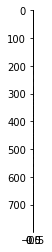

In [78]:
plt.imshow(X_test[:,1].reshape(784,1),cmap='gray')

# Saving model and retriving it back

In [ ]:
for key,value in parameters.items():
    np.savetxt("{}.csv".format(key), value, delimiter=",")

In [63]:
parameters={'W1':1,'W2':2,'b1':1,'b2':2}
for key,value in parameters.items():
    parameters[key]=np.genfromtxt("{}.csv".format(key),delimiter=',')
parameters['b1']=parameters['b1'].reshape(100,1)
parameters['b2']=parameters['b2'].reshape(10,1)